# Interpolation and extrapolation
Построить модель энергопотребления здания по часам.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

from matplotlib.pyplot import rcParams
rcParams["figure.figsize"] = 16, 8


In [2]:
energy = pd.read_csv("../data/train.csv")
print(energy.head())

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            0      0  2016-01-01 01:00:00            0.0
2            0      0  2016-01-01 02:00:00            0.0
3            0      0  2016-01-01 03:00:00            0.0
4            0      0  2016-01-01 04:00:00            0.0


## Обогощение данных
Добавить колонку с указанием часов суток для построения суточной модели потребления

In [3]:
energy["timestamp"] = pd.to_datetime(energy["timestamp"])
energy["hour"] = energy["timestamp"].dt.hour
print(energy.head())

   building_id  meter           timestamp  meter_reading  hour
0            0      0 2016-01-01 00:00:00            0.0     0
1            0      0 2016-01-01 01:00:00            0.0     1
2            0      0 2016-01-01 02:00:00            0.0     2
3            0      0 2016-01-01 03:00:00            0.0     3
4            0      0 2016-01-01 04:00:00            0.0     4


## Среднее потребление и медиана потребления электроэнергии по часам.

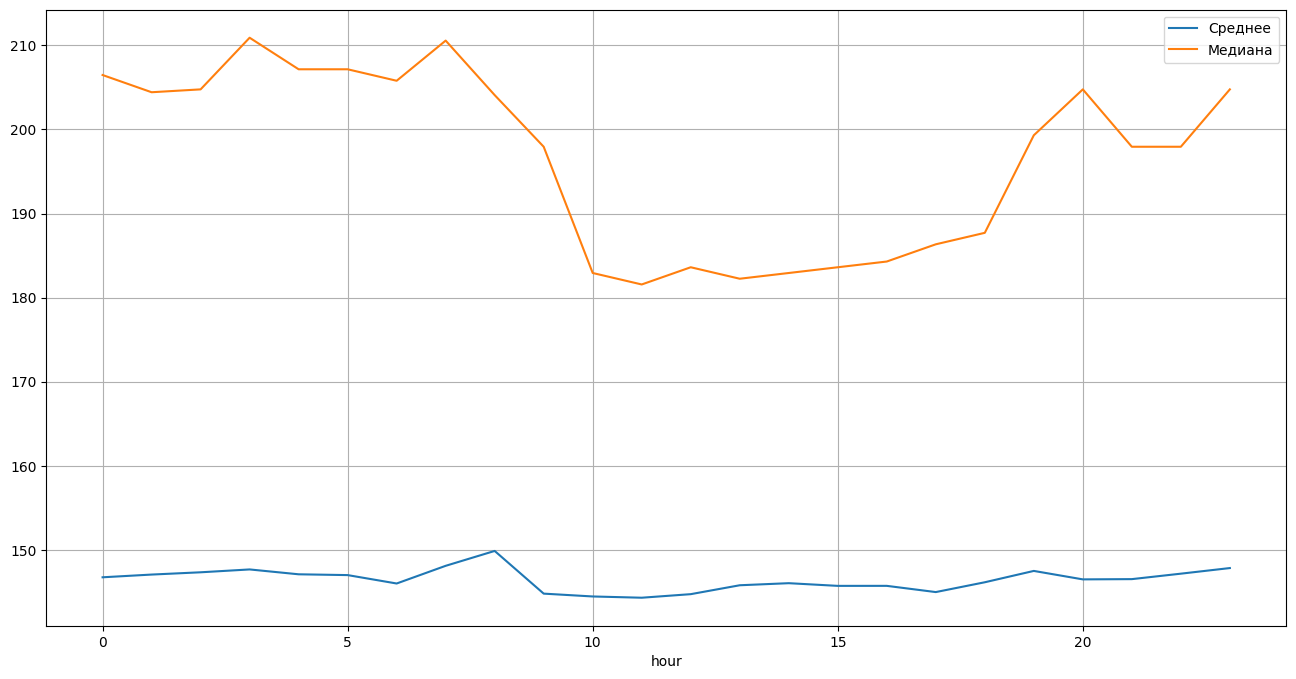

In [4]:
energy_hours = energy.groupby("hour")
energy_avg = pd.DataFrame(
    {
        "Среднее": energy_hours["meter_reading"].mean(),
        "Медиана": energy_hours["meter_reading"].median(),
    }
)
energy_avg.plot()
plt.grid()
plt.show()

## Удалить нулевые значения
**meter_reading** - потребление энергии в кВтч (или эквивалент)

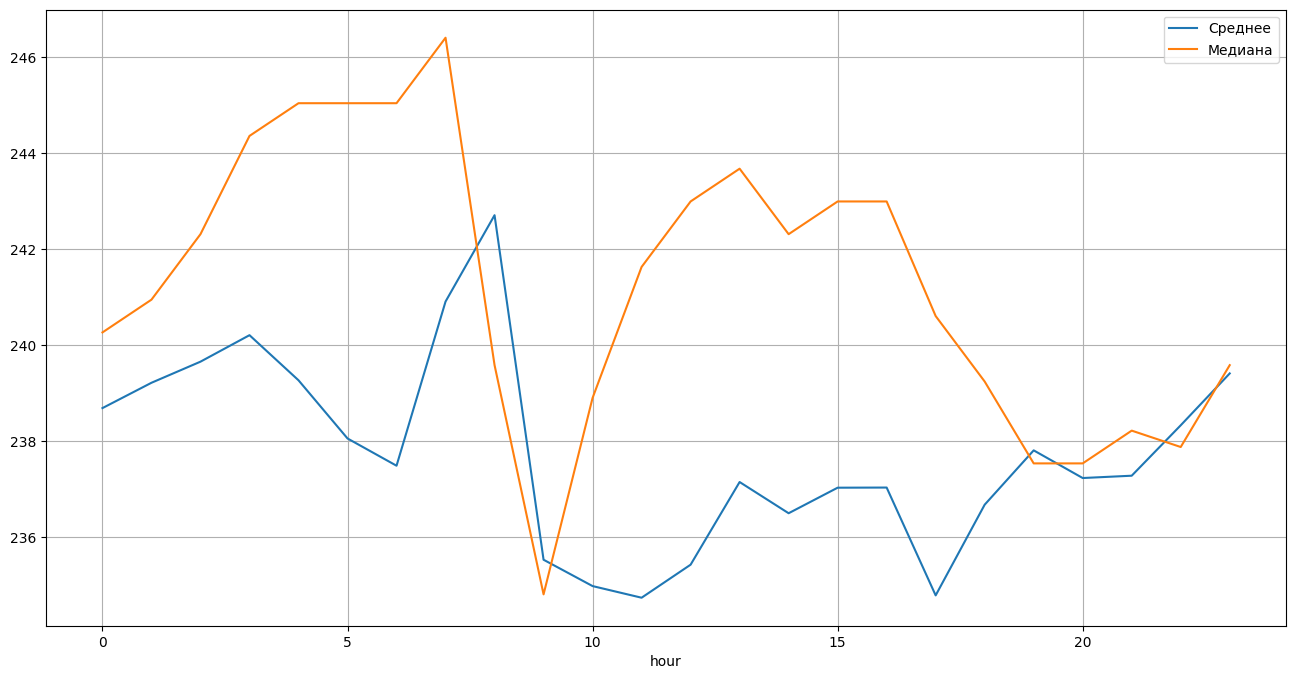

In [5]:
energy_hours_filtered = energy[energy["meter_reading"]>0].groupby("hour")
energy_avg_filtered = pd.DataFrame(
    {
        "Среднее": energy_hours_filtered["meter_reading"].mean(),
        "Медиана": energy_hours_filtered["meter_reading"].median(),
    }
)
energy_avg_filtered.plot()
plt.grid()
plt.show()

## Интерполяция данных по часам
Модель внутрисуточного потребления энергии по зданию

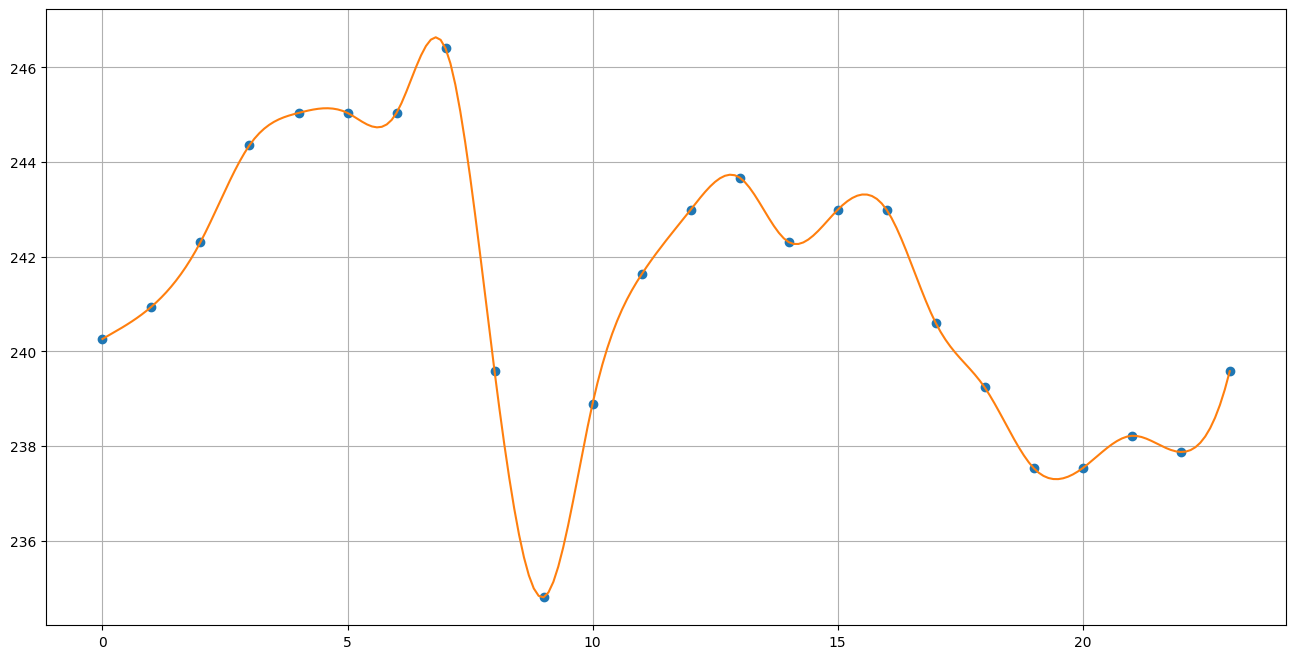

In [6]:
meter_reading_median = energy_hours_filtered["meter_reading"].median()
x = np.arange(0, 24)
y = interp1d(x, meter_reading_median, kind="cubic")
xn = np.arange(0, 23.1, 0.1)
yn = y(xn)
plt.plot(x, meter_reading_median, "o", xn, yn, "-")
plt.grid()
plt.show()